In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import pandas_profiling
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Venkat.Mohan\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Venkat.Mohan\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
   

In [2]:
pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

imdb = pd.read_csv("1000_movies_data.csv",encoding = "ISO-8859-1")  

In [3]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [4]:
#Exporting Pandas_Profiling before data cleaning
profile = pandas_profiling.ProfileReport(imdb)
profile.to_file(outputfile="imdb_preprocessing.html")

In [5]:
#Replacing empty space with '_' & eliminating parentheses
imdb.columns = imdb.columns.str.replace(' ','_')
imdb.columns = imdb.columns.str.replace('(','')
imdb.columns = imdb.columns.str.replace(')','')

In [6]:
#Converting columns into lower case
imdb.columns = imdb.columns.str.lower()

In [7]:
#Basic Analysis
imdb.describe()

,rank,year,runtime_minutes,rating,votes,revenue_millions,metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Inferences from describe()
##### 1. Movies are selected from year 2006 to 2016
##### 2. Length of movies is from 1 hour to 3 hours
##### 3. Rating ranges from 1.9 to 9. So movies most liked and most disliked are analysed
##### 4. Revenue ranges from 13 mn to 900 mn. So movies which grossed very poor and also very good are analysed.

In [8]:
#Analysing revenue and rating for filling NA
imdb[imdb['revenue_millions'].isnull()].describe()

,rank,year,runtime_minutes,rating,votes,revenue_millions,metascore
count,128.000000,128.000000,128.000000,128.000000,128.00000,0.0,98.000000
mean,553.398438,2014.859375,102.195312,6.102344,25642.96875,NaN,53.938776
std,289.046882,2.521512,16.218031,1.119931,55559.24748,NaN,18.476408
min,8.000000,2006.000000,73.000000,2.700000,61.00000,NaN,16.000000
25%,331.500000,2015.000000,90.000000,5.500000,999.75000,NaN,40.250000
50%,552.000000,2016.000000,100.000000,6.150000,4741.50000,NaN,54.500000
75%,811.750000,2016.000000,109.250000,6.900000,23785.50000,NaN,67.750000
max,999.000000,2016.000000,180.000000,8.400000,358932.00000,NaN,94.000000


In [9]:
#Computing Revenue according to rating of the movies
#As concentration is found from 5 to 8, we have bucketed the records into 3 groups
lowRatingMeanRevenue = imdb['revenue_millions'][imdb['rating'] < 5.0 ].mean()
midRatingMeanRevenue = imdb['revenue_millions'][(imdb['rating'] >= 5.0) & (imdb['rating'] <= 7.0) ].mean()
hiRatingMeanRevenue = imdb['revenue_millions'][imdb['rating'] > 7.0 ].mean()

In [10]:
#Replacing revenue_millions missing values with meanRevenue calculated above
count = 0
for i in imdb.index:
    if(np.isnan(imdb['revenue_millions'][i])):
        if(imdb['rating'][i] < 5.0):
            imdb['revenue_millions'][i] = lowRatingMeanRevenue
        elif((imdb['rating'][i] >= 5.0) & (imdb['rating'][i] <= 7.0)):
            imdb['revenue_millions'][i] = midRatingMeanRevenue
        elif(imdb['rating'][i] > 7.0):
            imdb['revenue_millions'][i] = hiRatingMeanRevenue
        count += 1
print(count)

#Replacing NaN values in Metascore with mean value
imdb['metascore'].fillna(value = imdb.metascore.mean(),inplace = True)

128


In [11]:
#Setting Rank as Index
imdb.set_index('rank',inplace=True)

In [12]:
imdb.sort_values(by='metascore',ascending=False)

,title,genre,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore
rank,,,,,,,,,,,
657,Boyhood,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.360000,100.0
42,Moonlight,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.850000,99.0
231,Pan's Labyrinth,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.620000,98.0
112,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.670000,96.0
490,Ratatouille,"Animation,Comedy,Family",A rat who can cook makes an unusual alliance w...,Brad Bird,"Brad Garrett, Lou Romano, Patton Oswalt,Ian Holm",2007,111,8.0,504039,206.440000,96.0
22,Manchester by the Sea,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.700000,96.0
510,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.080000,96.0
407,Zero Dark Thirty,"Drama,History,Thriller",A chronicle of the decade-long hunt for al-Qae...,Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7.4,226661,95.720000,95.0
325,The Social Network,"Biography,Drama",Harvard student Mark Zuckerberg creates the so...,David Fincher,"Jesse Eisenberg, Andrew Garfield, Justin Timbe...",2010,120,7.7,510100,96.920000,95.0


In [13]:
profile = pandas_profiling.ProfileReport(imdb)
profile.to_file(outputfile="imdb_postprocessing_1.html")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C144865898>]],
      dtype=object)

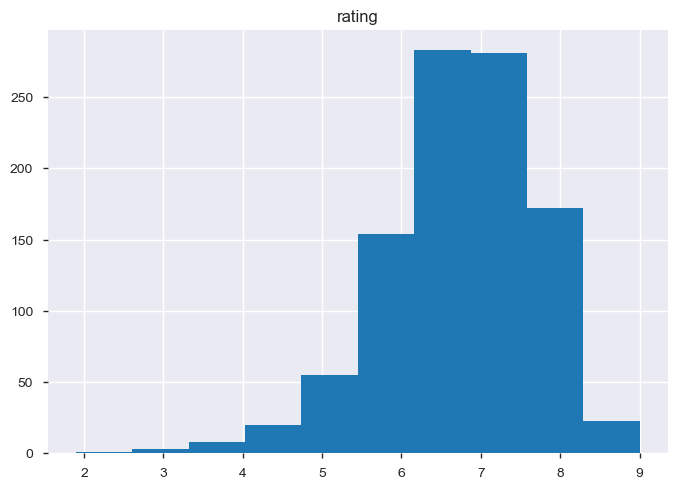

In [14]:
imdb.hist(column='rating',bins= 10)

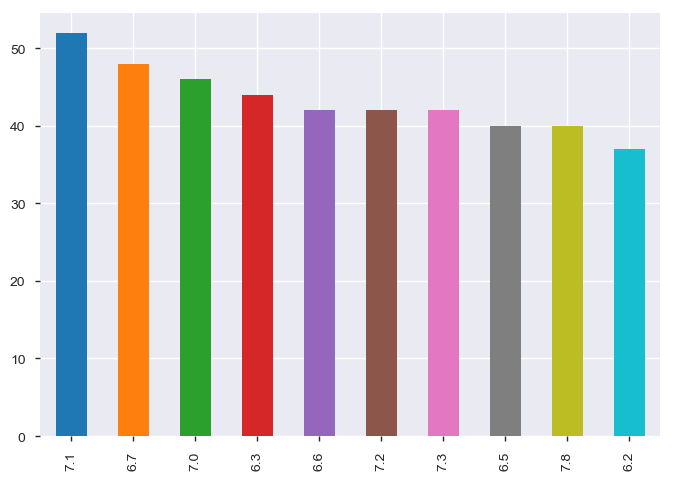

In [17]:
# Chart for finding out no. of top rated movies
imdb['rating'].value_counts().head(10).plot(x='rating',kind='bar')

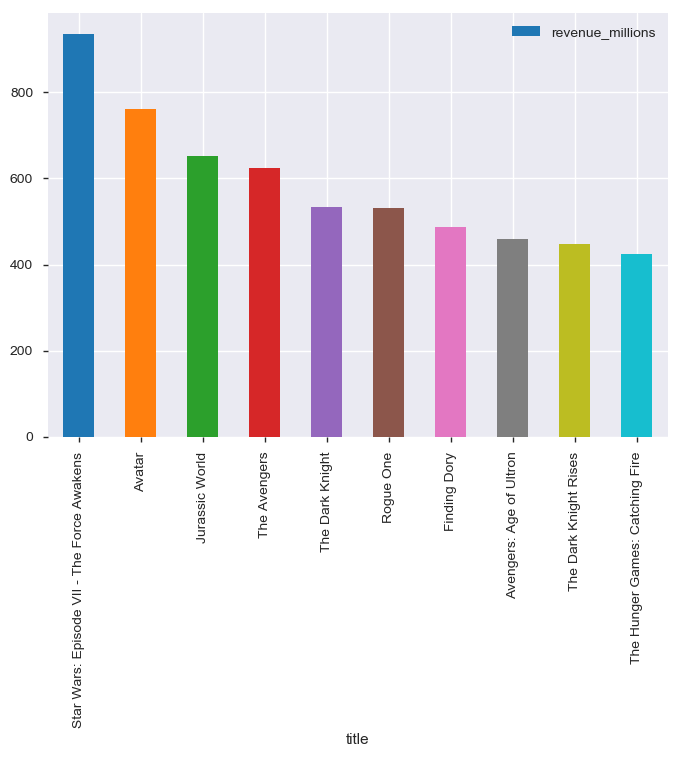

In [63]:
#Finding which movie has topped in gross collections
imdb.sort_values(by='revenue_millions',ascending=False)[['title','revenue_millions']].head(10).plot(x='title',y='revenue_millions',kind='bar')

In [18]:
#Differentiating two movies with same name by appending year of release
imdb['title'][(imdb['title'] == 'The Host') & (imdb['year']==2013)] = 'The Host 2013'
imdb['title'][(imdb['title'] == 'The Host') & (imdb['year']==2006)] = 'The Host 2006'

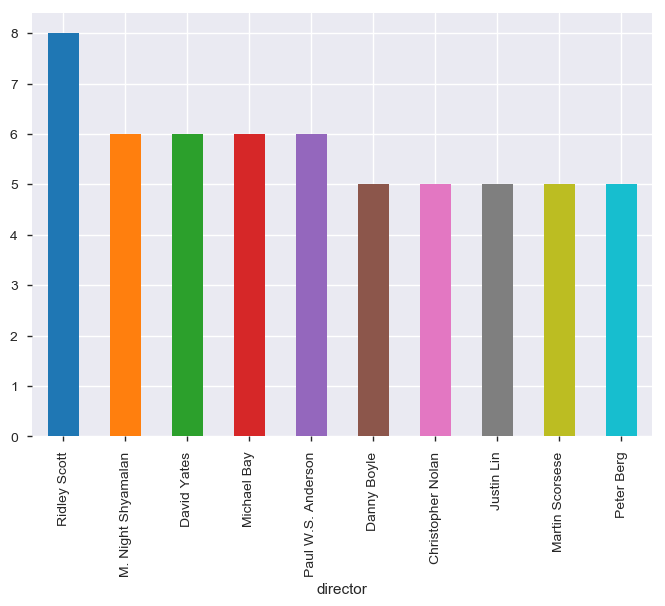

In [19]:
#Grouping movies by 'director' and finding top 10 contribution 
df = imdb.groupby(['director']).count()
df.sort_values(by= 'title',ascending=False)['title'].head(10).plot(x='director',y='count',kind='bar')

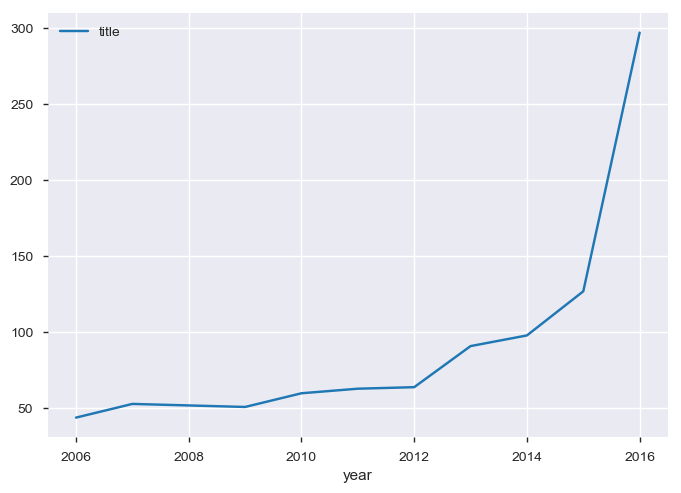

In [20]:
#Finding number of movies by year - taken for this particular dataset
imdb.groupby(['year'])[['title']].count().plot(kind='line')

In [49]:
#Forming a rich list of words from title and genre for Word Cloud
listCloud = []
for genre in imdb.genre:
    listCloud.append(genre)
for title in imdb.title:
    listCloud.append(title)
listCloud = list(dict.fromkeys(listCloud))
print(listCloud)

['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi', 'Horror,Thriller', 'Animation,Comedy,Family', 'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy', 'Action,Adventure,Biography', 'Adventure,Drama,Romance', 'Adventure,Family,Fantasy', 'Biography,Drama,History', 'Animation,Adventure,Comedy', 'Action,Comedy,Drama', 'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi', 'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror', 'Action,Adventure,Drama', 'Drama,Thriller', 'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi', 'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western', 'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy', 'Action,Crime,Thriller', 'Action,Crime,Drama', 'Adventure,Drama,History', 'Crime,Horror,Thriller', 'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller', 'Crime,Drama,Mystery', 'Drama,Romance,Thriller', 'Drama,History,Thriller', 'Action,Drama,Thriller', 'Drama,History', 'Action,Drama,Romance', 'Drama,Fantasy', 'Action,Sci-Fi', 'Adventu

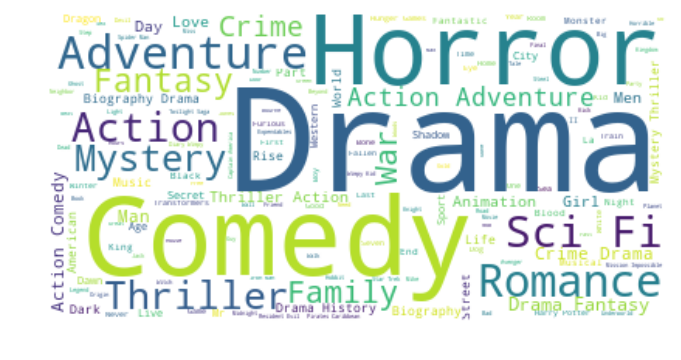

In [50]:
#Creating a wordcloud based on Genre before changing the Genre
from wordcloud import WordCloud,STOPWORDS
text = " ".join(words for words in listCloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('WordCloudTry.png')

In [51]:
# Creating a list of unique Genres from the movie list - To create a broad list of Genres
listGenre = []
dfGenre = pd.DataFrame((imdb['genre'].str.split(",",expand = True)))
for i in range(len(dfGenre)):
    for j in range(len(dfGenre.columns)):
        listGenre.append(dfGenre.iloc[i,j])
listGenre = list(dict.fromkeys(listGenre))
listGenre.remove(None)
listGenre

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [52]:
#Function to assign a single Genre to the movies
def movieGenre(genreList):
    genreList = list(genreList)
    #Formulating broad genres based on the list of unique Genres extracted above
    listAction = ['Action','Adventure','Sport']
    listDrama = ['Comedy','Family','Drama','Music','Musical','Romance','Western']
    listFantasy = ['Sci-Fi','Animation']
    listHistory = ['Biography','History','War']
    listMystery = ['Horror','Mystery','Thriller','Crime']
    if(set(genreList) & set(listFantasy)):
        return('Fantasy')
    elif(set(genreList) & set(listHistory)):
        return('History')
    elif(set(genreList) & set(listMystery)):
        return('Mystery')
    elif(set(genreList) & set(listDrama)):
        return('Drama')
    elif(set(genreList) & set(listAction)):
        return('Action')

In [53]:
imdb['finalgenre'] = imdb['genre'].str.split(',').apply(movieGenre) #Genre assign function call
imdb.drop(['genre'],inplace=True,axis=1) #Dropping genre as it is not required anymore
imdb

,title,description,director,actors,year,runtime_minutes,rating,votes,revenue_millions,metascore,finalgenre
rank,,,,,,,,,,,
1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.000000,Fantasy
2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.000000,Fantasy
3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.000000,Mystery
4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.000000,Fantasy
5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.000000,Action
6,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130000,42.000000,Action
7,La La Land,A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.000000,Drama
8,Mindhorn,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,67.447131,71.000000,Drama
9,The Lost City of Z,"A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010000,78.000000,History


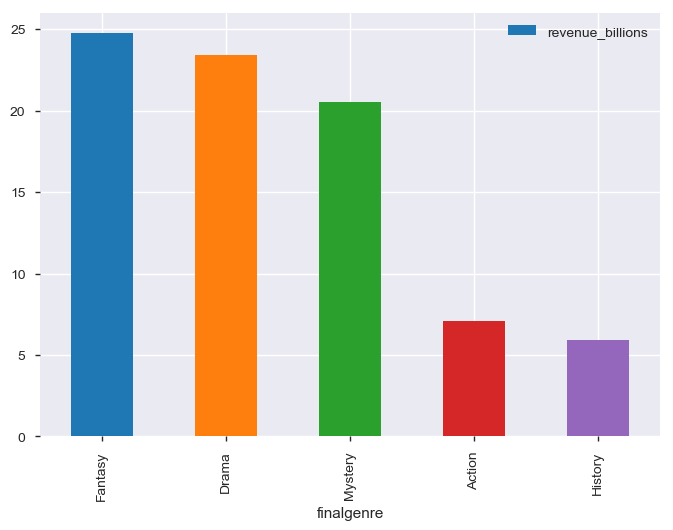

In [54]:
#Finding highest grossed genre (in billions)
dfGenRev = pd.DataFrame(imdb.groupby(by=['finalgenre'])['revenue_millions'].sum())
dfGenRev = dfGenRev.apply(lambda x: dfGenRev.revenue_millions/1000)
dfGenRev.columns = ['revenue_billions']
dfGenRev.sort_values(by='revenue_billions', ascending=False).plot(y='revenue_billions',kind='bar')

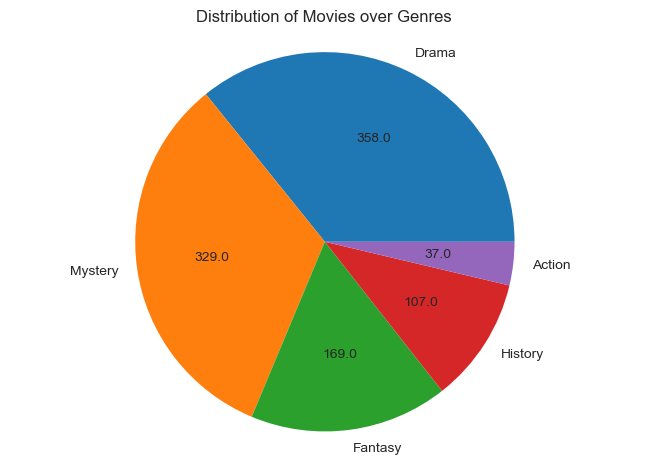

In [100]:
#Finding the distribution of movies across genre
dfGenrePie = pd.DataFrame(imdb.groupby(['finalgenre'])['title'].count()).sort_values(by='title',ascending=False)

#A function for returning aboslute value to plot in Pie chart
def absolute_value(val):
    a  = numpy.round(val/100.*dfGenrePie.title.sum(), 0)
    return a

plt.pie(dfGenrePie.title, labels=list(dfGenrePie.index), autopct=absolute_value)

plt.title("Distribution of Movies over Genres")
plt.axis('equal')
plt.show()